Matrix Completion

We intend to complete the Matrix with unkown entries using Matrix decomposotion where we learn decomposed matrices using Gradient Decent and Nested Linear Regression

Matrix Factorization

For a matrix $A_{n,m}$ learn $W_{n,r}$ and $H_{r,m}$ such that,

$ A = WH$

Method 1 : Gradient Decent

In [4]:
import numpy as  np
import matplotlib.pyplot as plt

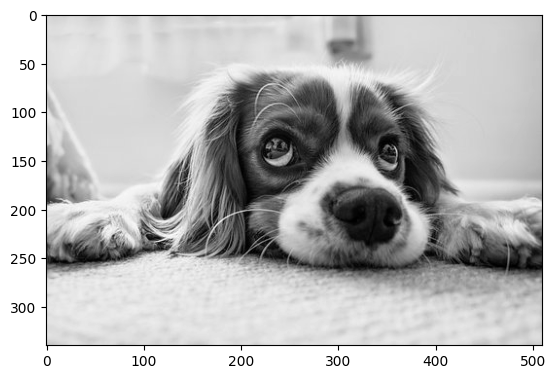

In [5]:
# Creating A
from matplotlib.image import imread

X = imread("Datasets/puppy.jpg")
A = np.mean(X,-1)
img = plt.imshow(A)
plt.set_cmap('gray')
plt.show()

In [120]:
# Normalizing the data

A_transformed = A/255

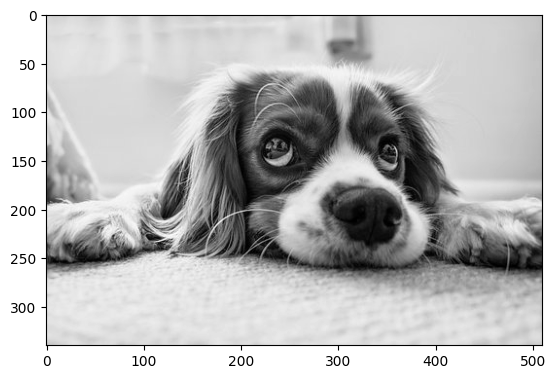

In [121]:
img = plt.imshow(A_transformed)
plt.set_cmap('gray')
plt.show()

In [ ]:
# Training

# Gradients

def loss_gradient_wrt_W(W,H,A):
    lg_matrix = np.empty(W.shape)
    N  = (A.shape[0]*A.shape[1])
    for j1 in range(W.shape[0]):
        M = A[j1] - W[j1]@H
        for j2 in range(W.shape[1]): 
            lg_matrix[j1][j2] = -2*( M @ H[j2])/ N
    return lg_matrix

def loss_gradient_wrt_H(W,H,A):
    lg_matrix = np.empty(H.shape)
    N  = (A.shape[0]*A.shape[1])
    for j2 in range(H.shape[0]):
        M = A[:,j2] - W@H[:,j2]
        for j1 in range(H.shape[1]):
            lg_matrix[j1][j2] = -(2* M @ W[:,j1])/ N
    return lg_matrix


def loss (A, W, H):
    return np.sum((A - W@H)**2)/(A.shape[0]*A.shape[1])

# intializing W and H
r = 100
n = A.shape[0]
m = A.shape[1]
W = 0.01*np.random.rand(n,r)
H = 0.01*np.random.rand(r,m)

max_iterations = 200

alpha = 150

for i in range(max_iterations):
    W = W - alpha*loss_gradient_wrt_W(W,H,A_transformed)
    H = H - alpha*loss_gradient_wrt_H(W,H,A_transformed)
    img = plt.imshow(W@H)
    if(i%5 == 0):
        print(loss(A_transformed, W,H))
        print(max((W@H)[0]))
        plt.set_cmap('gray')
        plt.show()

In [151]:
A_constructed = W@H

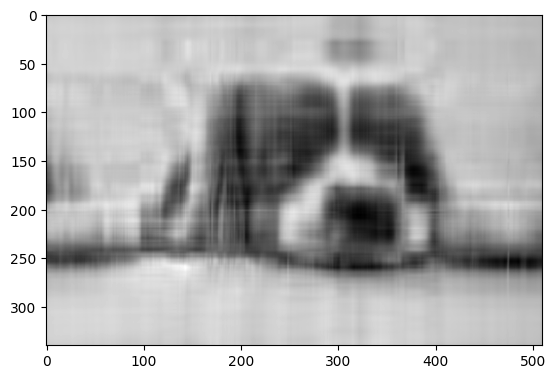

In [152]:
img = plt.imshow(A_constructed)
plt.set_cmap('gray')
plt.show()

If the given matrix A is incomplete, we simply don't take into account those elements in thee loss function for learning W and H. After learning W and H, the completed version of A is W @ H.

Method 2 : Alternating Least Squares

Let's first use the A matrix as it is :

In [ ]:
# intializing W and H
r = 100
n = A.shape[0]
m = A.shape[1]
W = np.random.rand(n,r)
H = np.random.rand(r,m)

# training

max_iterations = 100

for _ in range(max_iterations):
    # learning H
    for i in range(H.shape[1]):
        H[:,i] = np.linalg.inv((W.T@W))@W.T@A[:,i]
    # learning W
    for j in range(W.shape[0]):
        W[j] = np.linalg.inv(H@H.T)@H@A[j]
constructed_A = W@H

In [ ]:
img = plt.imshow(constructed_A)
plt.set_cmap('gray')
plt.show()

Dropping some values in A :

In [6]:
mask = np.random.rand(A.shape[0], A.shape[1])
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if mask[i][j] < 0.5:
            mask[i][j] = 1
        else :
            mask[i][j] = 0
M = np.ma.masked_array(A,mask)

In [7]:
A_incomplete = M.filled(np.nan)

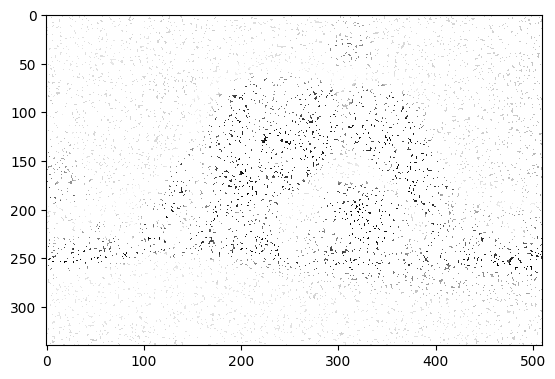

In [8]:
img = plt.imshow(A_incomplete)
plt.set_cmap('gray')
plt.show()

In [11]:
def plot_image(A):
    plt.imshow(A)
    plt.set_cmap('gray')
    plt.show()

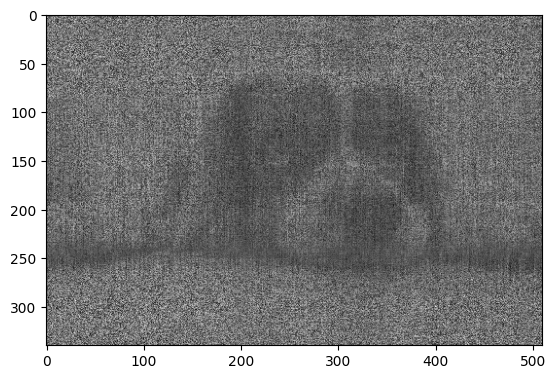

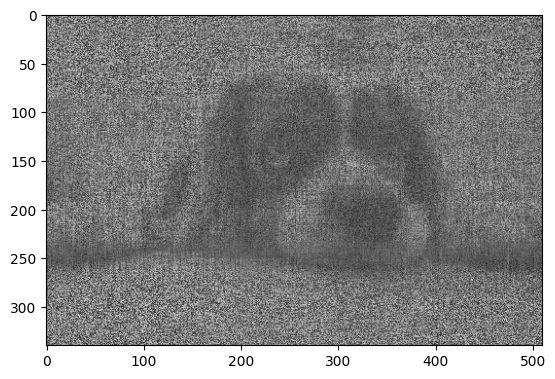

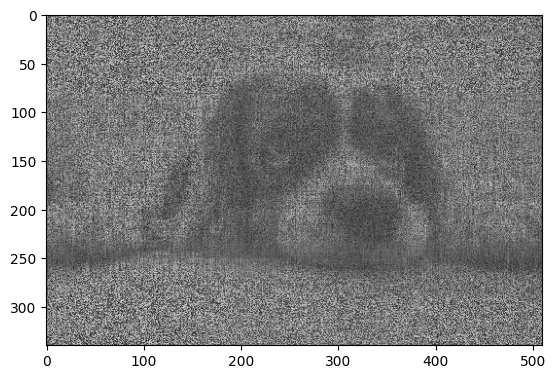

In [12]:
# Reconstructing

# intializing W and H
r = 100
n = A.shape[0]
m = A.shape[1]
W = np.random.rand(n,r)
H = np.random.rand(r,m)

# training

max_iterations = 3

for _ in range(max_iterations):
    # learning H
    for i in range(H.shape[1]):
        keep = ~np.isnan(A_incomplete[:,i])
        M = np.linalg.inv((W.T@W))@W.T
        for i1 in range(H.shape[0]):
            H[:,i][i1] = M[i1][keep]@A_incomplete[:,i][keep]
    # learning W
    for j in range(W.shape[0]):
        keep = ~np.isnan(A_incomplete[j])
        M = (np.linalg.inv(H@H.T)@H)
        for j1 in range(W.shape[1]):
            W[j][j1] = M[j1][keep]@A_incomplete[j][keep]
    plot_image(W@H)
constructed_A = W@H


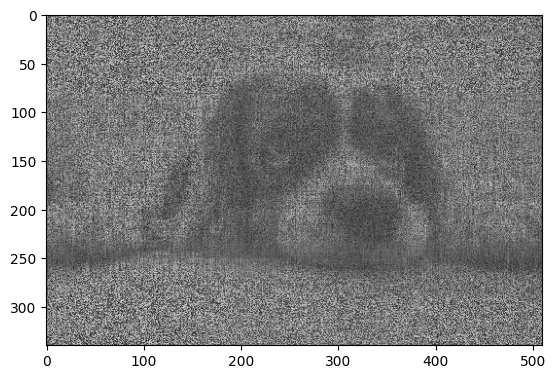

In [13]:
plot_image(constructed_A)